In [21]:
import numpy as np
import pandas as pd
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import seaborn as sns

# Read listing.csv and reviews.csv into dataframes and parse dates columns to datetime format
listings = pd.read_csv('listings.csv',parse_dates=['last_review'])
reviews = pd.read_csv('reviews.csv',parse_dates=['date'])

#Remove unwanted columns
listings.drop(['name','host_id','host_name','latitude','longitude','minimum_nights','neighbourhood_group'
            ,'calculated_host_listings_count','reviews_per_month','number_of_reviews']
            ,inplace=True, axis=1)

#data cleaning 
listings['neighbourhood'] = listings['neighbourhood'].str.strip()
listings['room_type'] = listings['room_type'].str.strip()

#Remove records where price = 0
listings = listings[listings.price != 0]

#Remove records with last_review prior to 2017
listings = listings[listings.last_review >= '2017-01-01']
reviews = reviews[reviews.date >= '2017-01-01']

In [22]:
#make copies of reviews for diff groupby
reviews_2 = reviews.copy()
reviews_3 = reviews.copy()

#find number_of_reviews, initial_review and last_review, and merge them to one table
reviews = reviews.groupby('listing_id')['date'].size().reset_index(name='number_of_reviews')

reviews_2 = reviews_2.sort_values(by=['date']).drop_duplicates(subset='listing_id', keep='first')
reviews_2.rename(columns={'date': 'initial_review'}, inplace=True)
reviews = pd.merge(reviews, reviews_2, how='inner', on='listing_id')

reviews_3 = reviews_3.sort_values(by=['date']).drop_duplicates(subset='listing_id', keep='last')
reviews_3.rename(columns={'date': 'last_review'}, inplace=True)
updated_reviews = pd.merge(reviews, reviews_3, how='inner', on='listing_id')

#fill in a new column called avg_reviews_per_month
pd.options.display.float_format = '{:,.1f}'.format
updated_reviews = updated_reviews.assign(avg_reviews_per_month=reviews['number_of_reviews']/(12 *
                    (updated_reviews['last_review'].map(lambda x: x.year) -
                     updated_reviews['initial_review'].map(lambda x: x.year)) +
                    (updated_reviews['last_review'].map(lambda x: x.month) -
                     updated_reviews['initial_review'].map(lambda x: x.month))+1))

#we can merge the table if we want
listings = listings.rename(columns={"id": "listing_id"})
updated_listings = pd.merge(listings, updated_reviews, how='left', on=['listing_id','last_review'])
print(updated_listings)



      listing_id              neighbourhood        room_type  price  \
0           2318                    Madrona  Entire home/apt    296   
1           4291                  Roosevelt     Private room     82   
2           5682             South Delridge  Entire home/apt     48   
3           6606                Wallingford  Entire home/apt     90   
4           9419                 Georgetown     Private room     65   
5           9460                 First Hill     Private room     80   
6           9531             Fairmount Park  Entire home/apt    165   
7           9534             Fairmount Park  Entire home/apt    125   
8           9596                Wallingford  Entire home/apt    120   
9           9909             Fairmount Park  Entire home/apt    125   
10         10209                 High Point     Private room     50   
11         10385                 Maple Leaf     Private room     60   
12         10695                 Maple Leaf     Private room    109   
13    

In [23]:
#Calculate popularity of neighbourhoods
listings_2 = updated_listings.copy()
listings_2 = listings_2.assign(days_booked_365=listings_2['availability_365'].map(lambda x: 365-x))
popularity = listings_2.groupby('neighbourhood')['avg_reviews_per_month','days_booked_365'].mean()
popularity = popularity.rename(columns={'avg_reviews_per_month':'neighborhood_avg_monthly_reviews'
            ,'days_booked_365':'neibhorhood_days_booked_365'})
print('neighborhood popularity:')
print(popularity)

neighborhood popularity:
                           neighborhood_avg_monthly_reviews  \
neighbourhood                                                 
Adams                                                   3.0   
Alki                                                    2.9   
Arbor Heights                                           3.4   
Atlantic                                                3.3   
Belltown                                                2.9   
Bitter Lake                                             2.2   
Briarcliff                                              2.1   
Brighton                                                2.8   
Broadview                                               2.9   
Broadway                                                3.4   
Bryant                                                  2.1   
Cedar Park                                              1.6   
Central Business District                               1.8   
Columbia City                 

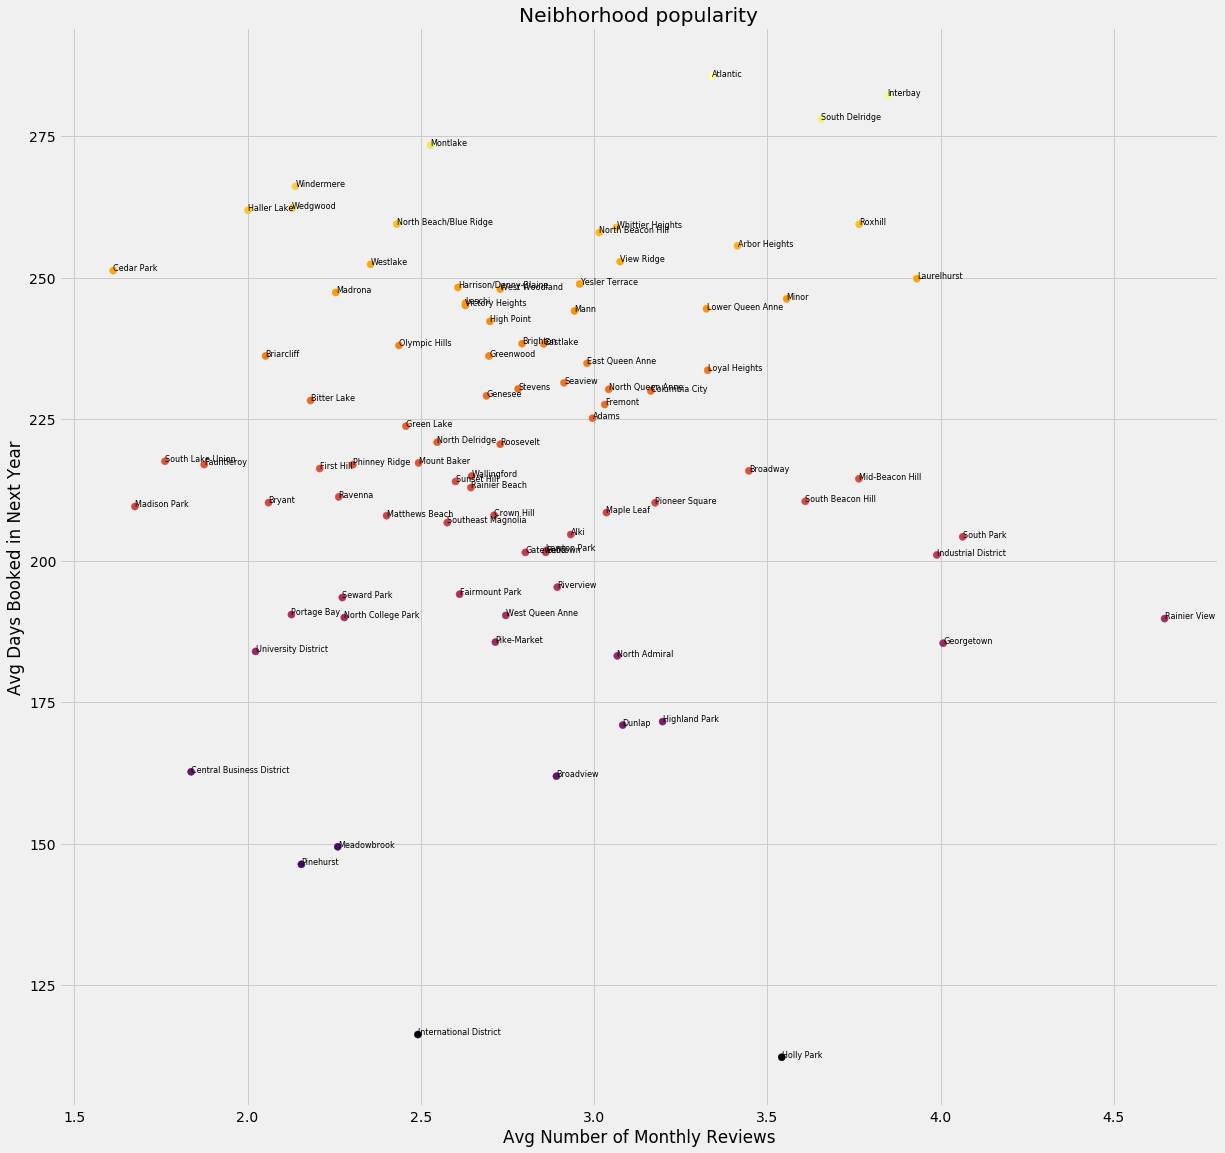

In [25]:
#Plot popularity of neighborhoods
x = popularity.loc[:,'neighborhood_avg_monthly_reviews']
y = popularity.loc[:,'neibhorhood_days_booked_365']
n = (popularity.index.tolist())
fig, ax = plt.subplots()
fig.set_size_inches(18.5, 18.5)
ax.scatter(x, y, c=y, cmap='inferno', s =50)
#plt.plot(x, y, 'o')

plt.xlabel('Avg Number of Monthly Reviews')
plt.ylabel('Avg Days Booked in Next Year')
plt.title('Neibhorhood popularity')

for i, txt in enumerate(n):
    ax.annotate(txt, (x[i],y[i]), fontsize = 8)
plt.show()

KeyError: 'price'

In [12]:
import matplotlib.pyplot as plt
x = listings_pr.loc[:,'price';
y = ys
plt.plot(x, y)

TypeError: list indices must be integers, not str